In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import plot_model
import numpy as np

In [96]:
# Load data
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

In [97]:
# Standardize data
mean = np.mean(train_images)
std_dev = np.std(test_images)
train_images = (train_images - mean) / std_dev
test_images = (test_images - mean) / std_dev

In [98]:
# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [99]:
# Create network
inputs = Input(shape=(32, 32, 3))
conv2d_1 = Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), activation="relu", padding="same", kernel_initializer="he_normal", bias_initializer="zeros")(inputs)
dropout_1 = Dropout(rate=0.2)(conv2d_1)
conv2d_2 = Conv2D(filters=64, kernel_size=(4, 4), strides=(2, 2), activation="relu", padding="same", kernel_initializer="he_normal", bias_initializer="zeros")(dropout_1)
dropout_2 = Dropout(rate=0.2)(conv2d_2)
conv2d_3 = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation="relu", padding="same", kernel_initializer="he_normal", bias_initializer="zeros")(dropout_2)
maxpool2d_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2d_3)
flatten_1 = Flatten()(maxpool2d_1)
dense_1 = Dense(128, activation="relu", kernel_initializer="he_normal", bias_initializer="zeros")(flatten_1)
dropout_4 = Dropout(rate=0.2)(dense_1)
dense_2 = Dense(128, activation="relu", kernel_initializer="he_normal", bias_initializer="zeros")(dropout_4)
dropout_5 = Dropout(rate=0.2)(dense_2)
outputs = Dense(10, activation="softmax", kernel_initializer="glorot_uniform", bias_initializer="zeros")(dropout_5)
model = Model(inputs=inputs, outputs=outputs)

In [100]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 32)        2432      
_________________________________________________________________
dropout_41 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
dropout_42 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 128)         0   

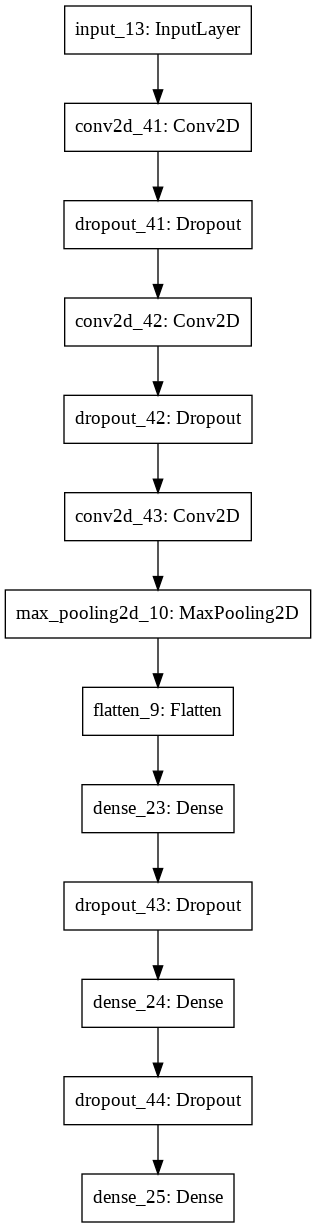

In [101]:
plot_model(model)

In [102]:
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy", keras.metrics.AUC()])

In [103]:
history = model.fit(x=train_images, y=train_labels, batch_size=32, epochs=128)

Epoch 1/128
1563/1563 [==============================] - 134s 34ms/step - loss: 1.7506 - accuracy: 0.3509 - auc_5: 0.8155
Epoch 2/128
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4473 - accuracy: 0.4721 - auc_5: 0.8797
Epoch 3/128
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2967 - accuracy: 0.5322 - auc_5: 0.9043
Epoch 4/128
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1907 - accuracy: 0.5741 - auc_5: 0.9195
Epoch 5/128
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1150 - accuracy: 0.6038 - auc_5: 0.9293
Epoch 6/128
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0593 - accuracy: 0.6280 - auc_5: 0.9360
Epoch 7/128
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0088 - accuracy: 0.6429 - auc_5: 0.9418
Epoch 8/128
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9702 - accuracy: 0.6593 - auc_5: 0.9461
Epoch 9/128
1563/1563 [========